# News Trends

In [2]:
import requests
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [9]:
from config import * # config안의 정보 가져오기

In [10]:
url = f"{ELASTIC_SEARCH_URL}/news/_search"

In [11]:
def get_news_trends (publisher):
    query = """
    {
        "size": 0,
        "aggs": {
            "group_by_publisher": {
                "terms": {
                    "field": "publisher.keyword"
                }
            }
        }
    }    
    """

    headers = {
        'Content-Type': 'application/json'
    }

    resp = requests.get(
       url,
        data=query,
        headers=headers,
        auth = ELASTIC_SEARCH_AUTH
    )

    data = resp.json()

    return data

In [12]:
tmp = pd.DataFrame(get_news_trends('d')['aggregations']['group_by_publisher']['buckets'])
tmp = tmp.set_index('key')
tmp

,doc_count
key,
연합뉴스,10787
뉴스1,10345
뉴시스,9557
이데일리,8860
파이낸셜뉴스,6469
아시아경제,5785
머니투데이,5676
서울경제,4695
한국경제,4644


<BarContainer object of 10 artists>

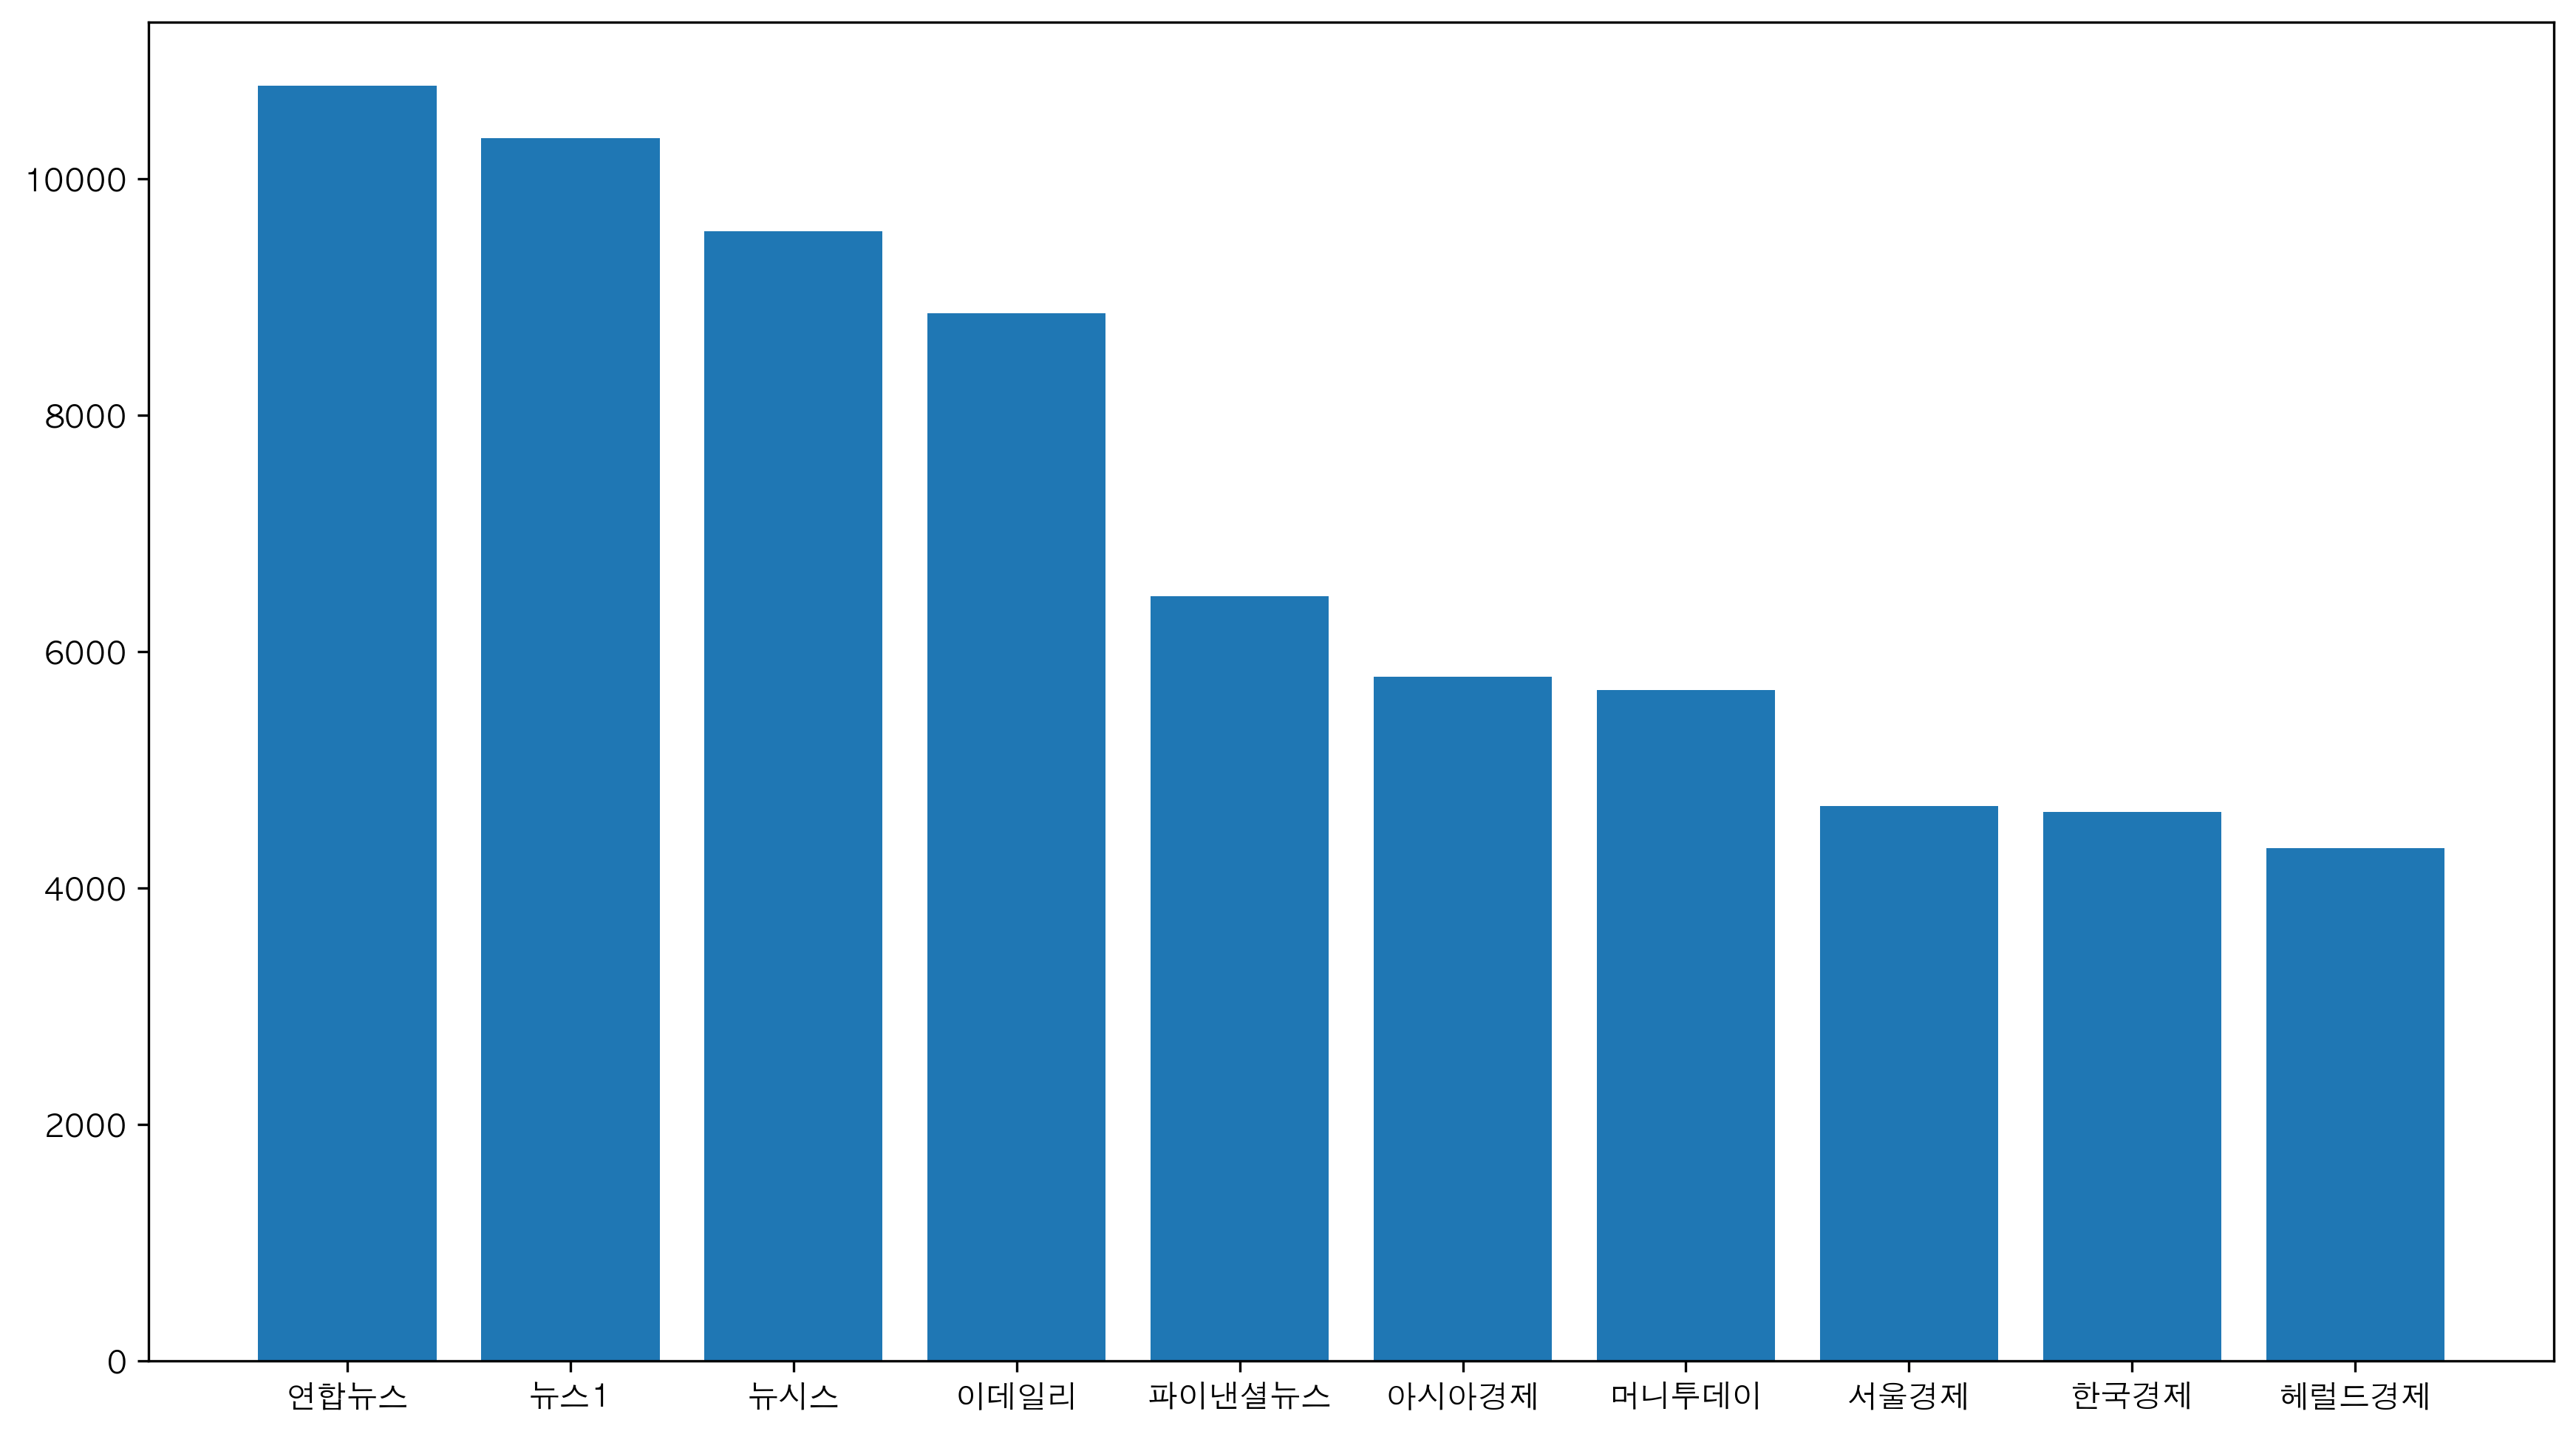

In [13]:
plt.figure(figsize=(14,8), dpi=300, facecolor='w')
plt.bar(tmp.index, tmp['doc_count'])


In [14]:
def sorting_daily_docs ():
    query = """
    {
    "size": 0,
    "aggs": {
        "group_by_date": {
        "date_histogram": {
            "field": "created_at",
            "interval": "day"
        }
        }
    }
    }
    """

    headers = {
        'Content-Type': 'application/json'
    }

    resp = requests.get(
        url,
        data=query,
        headers=headers,
        auth = ELASTIC_SEARCH_AUTH
    )    

    data = resp.json()

    trends = data['aggregations']['group_by_date']['buckets']

    df = pd.DataFrame(data = trends)

    df['key_as_string'] = pd.to_datetime(df['key_as_string'])
    df = df.set_index('key_as_string')    

    return df
    
    

In [102]:
query = """
{
  "size": 0,
  "aggs": {
    "group_by_date": {
      "date_histogram": {
        "field": "created_at",
        "interval": "day"
      }
    }
  }
}
"""

In [103]:
query

'\n{\n  "size": 0,\n  "aggs": {\n    "group_by_date": {\n      "date_histogram": {\n        "field": "created_at",\n        "interval": "day"\n      }\n    }\n  }\n}\n'

In [24]:
headers = {
    'Content-Type': 'application/json'
}

In [105]:
# resp = requests.get(
#     url,
#     data=query,
#     headers=headers,
#     auth = ELASTIC_SEARCH_AUTH
# )

In [106]:
resp.status_code

200

In [107]:
data = resp.json()

In [108]:
data

{'took': 5,
 'timed_out': False,
 '_shards': {'total': 5, 'successful': 5, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 0, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'group_by_date': {'buckets': []}}}

In [109]:
trends = data['aggregations']['group_by_date']['buckets']

In [110]:
trends

[]

In [111]:
import datetime as dt

In [112]:
dates = [dt.datetime.fromisoformat(x['key_as_string'][:-1]) for x in trends]

In [113]:
dates[:5]

[]

In [114]:
doc_counts = [x['doc_count'] for x in trends]

In [15]:
import matplotlib.pyplot as plt

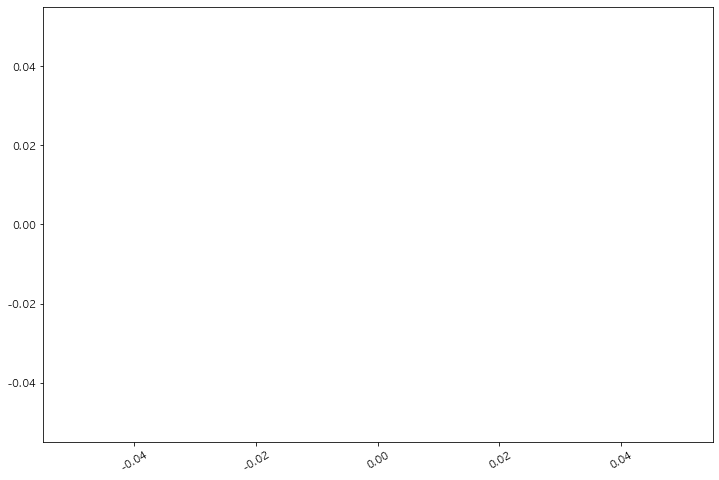

In [116]:
plt.figure(figsize=(12,8))
plt.plot(dates, doc_counts)
plt.xticks(rotation=30)
plt.show()

In [117]:
import pandas as pd

In [118]:
df = pd.DataFrame(data = trends)
df.head(3)

""


In [120]:
#df['date'] = pd.to_datetime(df['key_as_string'])

In [121]:
df = df.set_index('date')

KeyError: "None of ['date'] are in the columns"

In [16]:
plt.figure(figsize=(12,8))
plt.plot(df['doc_count'])
plt.xticks(rotation=30)
plt.show()

NameError: name 'df' is not defined

<Figure size 864x576 with 0 Axes>

# 검색 쿼리 만들기

In [17]:
from urllib import parse

In [18]:
def sorting_daily_docs_with_keyword (keyword):
    query = f'''
    {{
    "size": 0,
        "aggs": {{
            "group_by_date": {{
            "date_histogram": {{
                "field": "created_at",
                "interval": "day"
                }}
            }}
        }},
        "query" :{{
            "match": {{
            "body" : "{keyword}"
            }}
        }}
    }}
    ''' 

    resp = requests.get(
        url,
        data=query.encode('utf-8'),
        headers=headers,
        auth = ELASTIC_SEARCH_AUTH
    )

    data = resp.json()['aggregations']['group_by_date']['buckets']

    df = pd.DataFrame(data)

    df['key_as_string'] = pd.to_datetime(df['key_as_string'])

    df = df.set_index('key_as_string')

    return df


In [22]:
sorting_daily_docs()

,key,doc_count
key_as_string,,
2022-04-01 00:00:00+00:00,1648771200000,4630
2022-04-02 00:00:00+00:00,1648857600000,667
2022-04-03 00:00:00+00:00,1648944000000,1754
2022-04-04 00:00:00+00:00,1649030400000,4903
2022-04-05 00:00:00+00:00,1649116800000,5507
2022-04-06 00:00:00+00:00,1649203200000,5307
2022-04-07 00:00:00+00:00,1649289600000,5362
2022-04-08 00:00:00+00:00,1649376000000,3743
2022-04-09 00:00:00+00:00,1649462400000,590


In [ ]:
df

,key_as_string,key,doc_count
date,,,
2022-04-01 00:00:00+00:00,2022-04-01T00:00:00.000Z,1648771200000,4630
2022-04-02 00:00:00+00:00,2022-04-02T00:00:00.000Z,1648857600000,667
2022-04-03 00:00:00+00:00,2022-04-03T00:00:00.000Z,1648944000000,1754
2022-04-04 00:00:00+00:00,2022-04-04T00:00:00.000Z,1649030400000,4903
2022-04-05 00:00:00+00:00,2022-04-05T00:00:00.000Z,1649116800000,5507
2022-04-06 00:00:00+00:00,2022-04-06T00:00:00.000Z,1649203200000,5307
2022-04-07 00:00:00+00:00,2022-04-07T00:00:00.000Z,1649289600000,5362
2022-04-08 00:00:00+00:00,2022-04-08T00:00:00.000Z,1649376000000,3743
2022-04-09 00:00:00+00:00,2022-04-09T00:00:00.000Z,1649462400000,590


In [30]:
def sorting_daily_docs_with_keyword (keyword):
    query = f'''
    {{
    "size": 0,
        "aggs": {{
            "group_by_date": {{
            "date_histogram": {{
                "field": "created_at",
                "interval": "day"
                }}
            }}
        }},
        "query" :{{
            "match": {{
            "body" : "{keyword}"
            }}
        }}
    }}
    ''' 

    resp = requests.get(
        url,
        data=query.encode('utf-8'),
        headers=headers,
        auth = ELASTIC_SEARCH_AUTH
    )

    data = resp.json()['aggregations']['group_by_date']['buckets']

    df = pd.DataFrame(data)

    return data

In [31]:
sorting_daily_docs_with_keyword('섹시')

[]

In [ ]:
#find_obj = urllib.parse.quote('비트코인')

query = '''
{
  "size": 0,
  "aggs": {
    "group_by_date": {
      "date_histogram": {
        "field": "created_at",
        "interval": "day"
      }
    }
  },
  "query" :{
    "match": {
      "body" : "{}"
    }
  }
}
'''

In [ ]:
resp = requests.get(
    url,
    data=query.encode('utf-8'),
    headers=headers,
    auth = ELASTIC_SEARCH_AUTH
)

In [ ]:
data = resp.json()

In [ ]:
df = pd.DataFrame(data = data['aggregations']['group_by_date']['buckets'])

In [ ]:
df2 = df.copy()

In [ ]:
df

""


## 나의 포트폴리오 가정

In [134]:
port = pd.DataFrame()

port['name'] = ['에스티오'] 
port['weight'] = [0.3]

port

,name,weight
0,에스티오,0.3


In [ ]:
list(port['name'])

['삼성전자', 'SK하이닉스', 'LG에너지솔루션', '에스티오']

In [127]:
sorting_daily_docs()

,key,doc_count
key_as_string,,
2022-04-01 00:00:00+00:00,1648771200000,4630
2022-04-02 00:00:00+00:00,1648857600000,667
2022-04-03 00:00:00+00:00,1648944000000,1754
2022-04-04 00:00:00+00:00,1649030400000,4903
2022-04-05 00:00:00+00:00,1649116800000,5507
2022-04-06 00:00:00+00:00,1649203200000,5307
2022-04-07 00:00:00+00:00,1649289600000,5362
2022-04-08 00:00:00+00:00,1649376000000,3743
2022-04-09 00:00:00+00:00,1649462400000,590


In [135]:
# tmp = pd.DataFrame(columns=['key_as_string', 'key', 'doc_count'])

for i, k in enumerate(list(port['name'])):
    
    all_news = sorting_daily_docs()
    df = sorting_daily_docs_with_keyword(i)

    if i == 1:
        tmp = df
    else:
        tmp['doc_count'] += df['doc_count']

#     #tmp = tmp.rename(columns={'doc_count':'port_mentioned'})
#     #tmp['total_doc'] = all_news['doc_count']
    tmp['ratio'] = round((tmp['doc_count'] / all_news['doc_count']) * 100, 4)

tmp

,key,doc_count,ratio
key_as_string,,,
2022-04-01 00:00:00+00:00,1648771200000,446,9.6328
2022-04-02 00:00:00+00:00,1648857600000,84,12.5937
2022-04-03 00:00:00+00:00,1648944000000,234,13.3409
2022-04-04 00:00:00+00:00,1649030400000,451,9.1984
2022-04-05 00:00:00+00:00,1649116800000,604,10.9679
2022-04-06 00:00:00+00:00,1649203200000,496,9.3461
2022-04-07 00:00:00+00:00,1649289600000,588,10.9661
2022-04-08 00:00:00+00:00,1649376000000,360,9.6180
2022-04-09 00:00:00+00:00,1649462400000,78,13.2203


<BarContainer object of 30 artists>

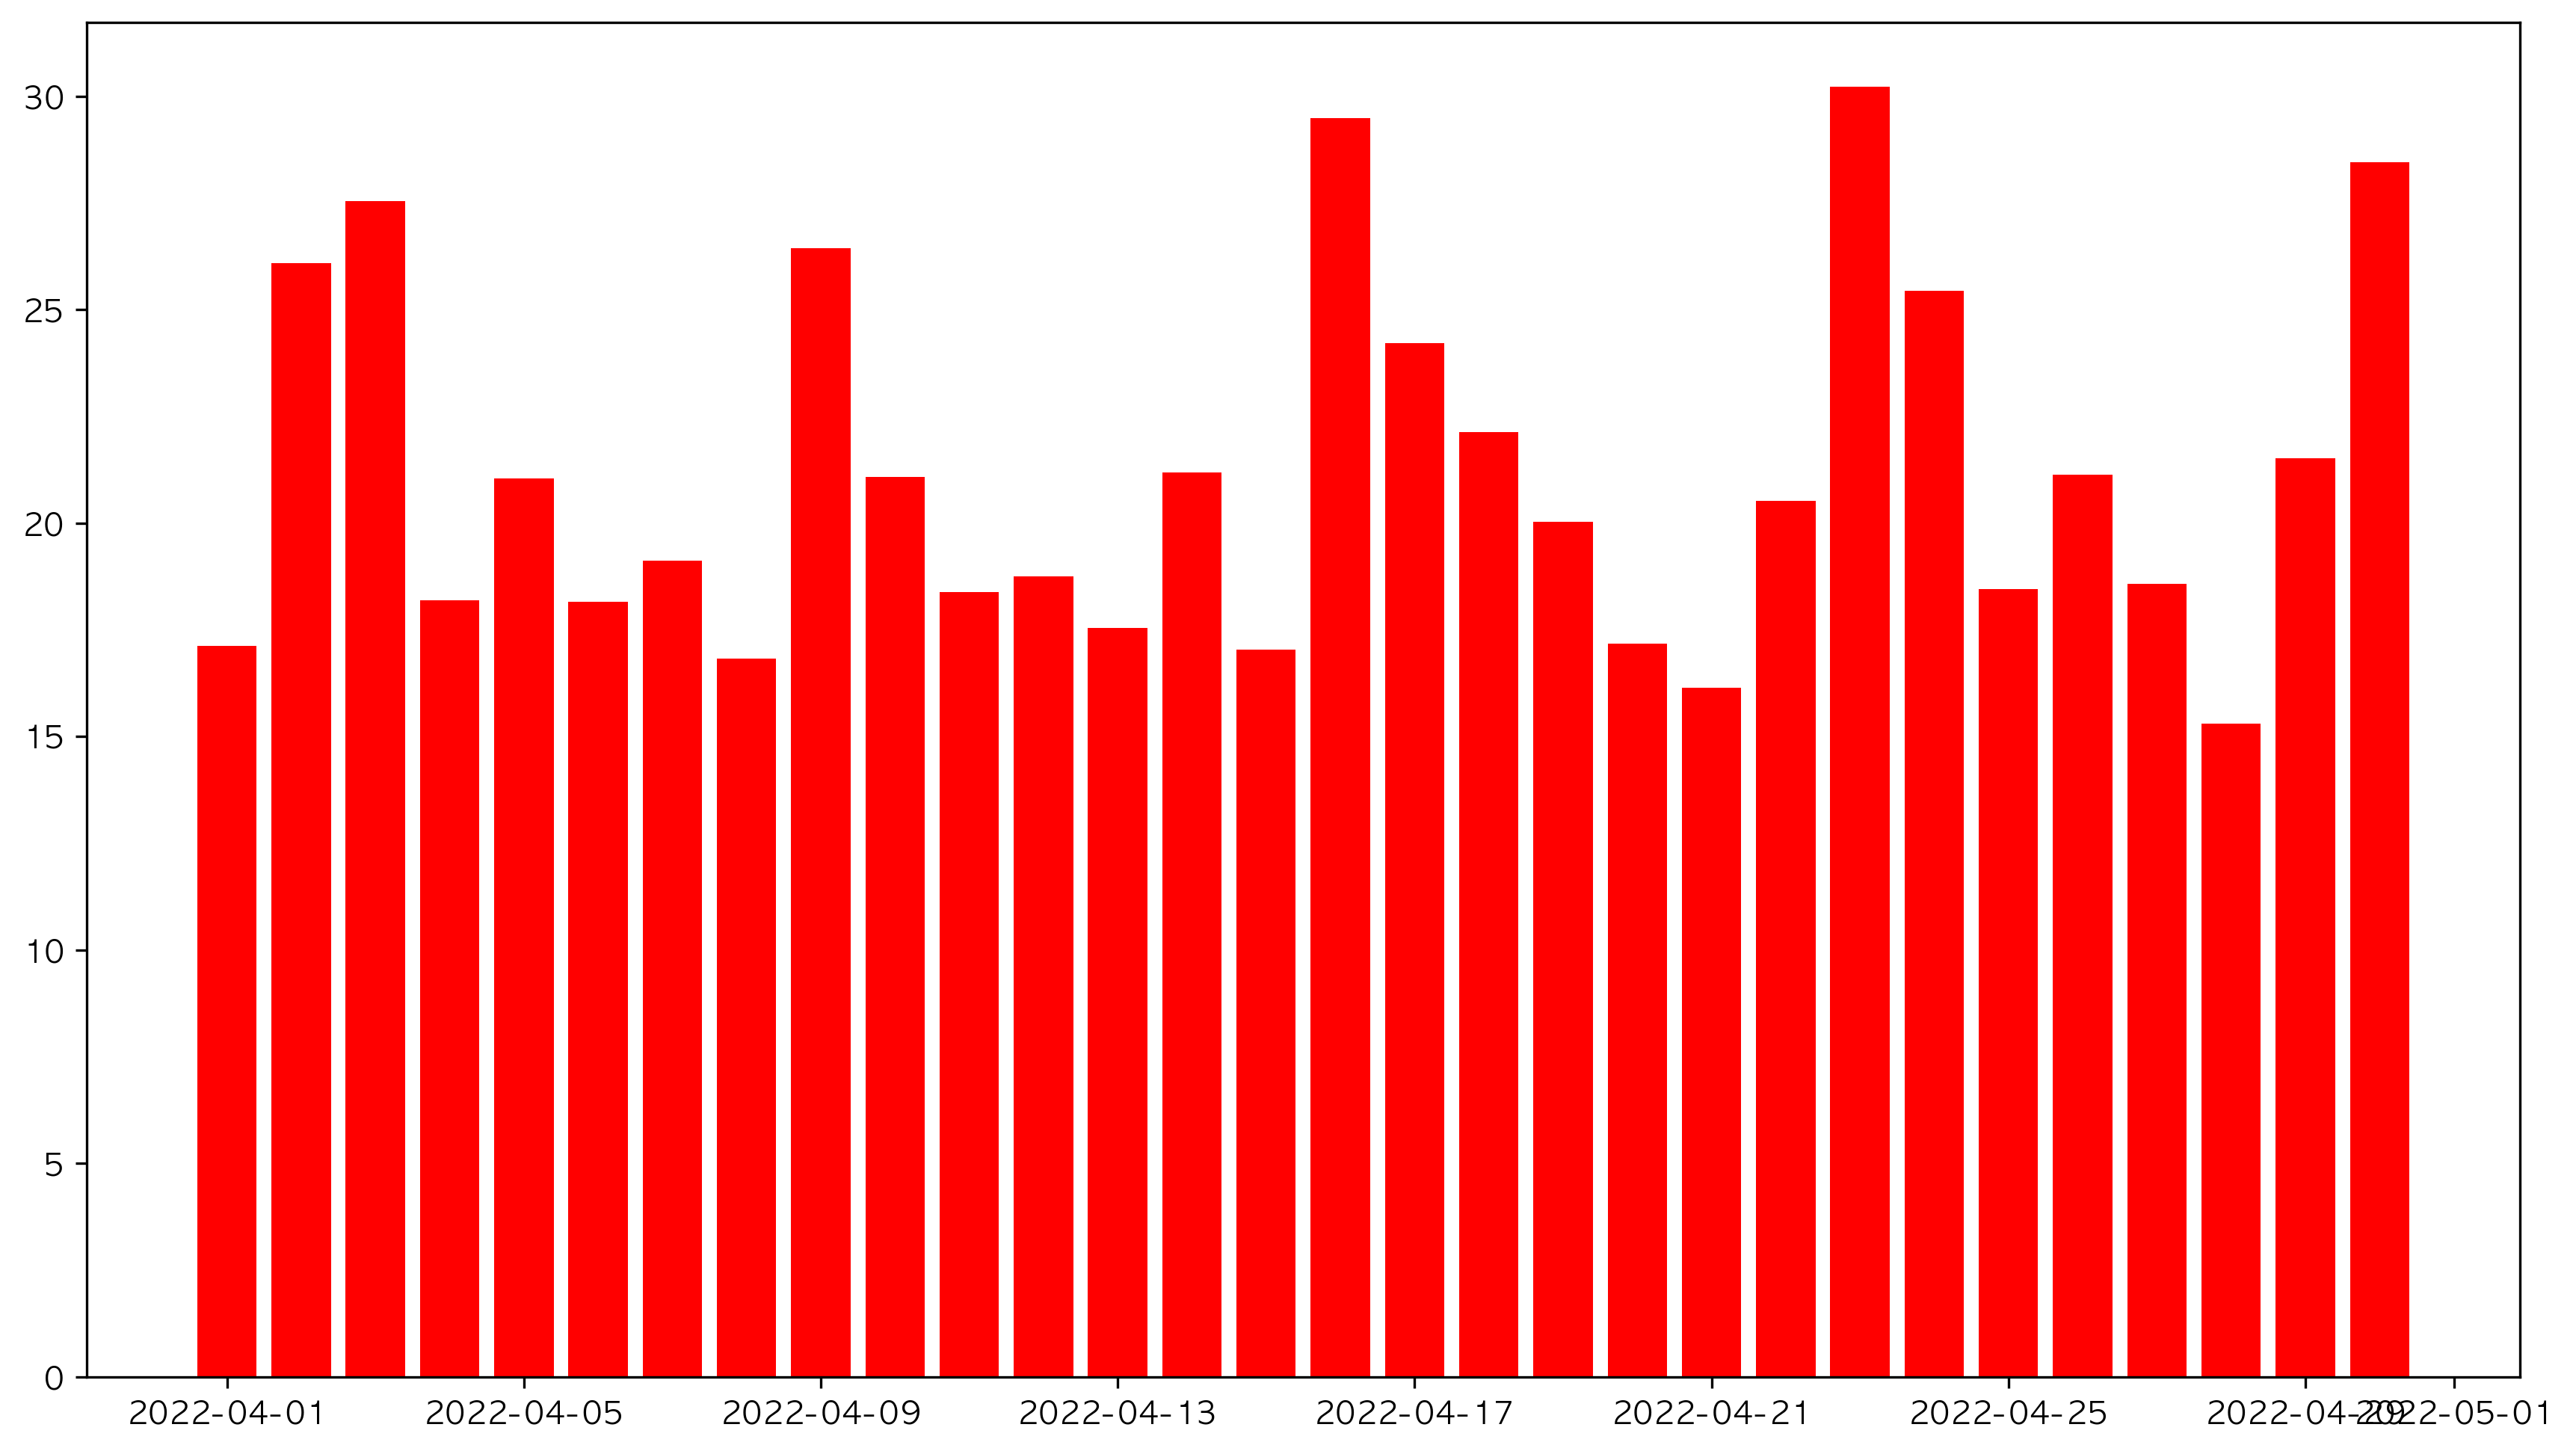

In [ ]:
plt.figure(figsize=(14,8), dpi=300, facecolor='w')
plt.bar(tmp.index, tmp['ratio'], color='r')